# To perform exploratory data analysis (EDA) using pandas, numpy, and seaborn on the Titanic dataset. This dataset contains information about the passengers on the Titanic, such as their age, gender, ticket class, and survival status.



In [1]:
# Importing dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the Dataset
titanic = sns.load_dataset('titanic')

In [3]:
# Data Overview
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



### Feature Names and Their Descriptions

1. **survived:** 
   - Indicates whether the passenger survived the Titanic disaster. 
   - 0 = Yes, 1 = No

2. **pclass:**
   - Passenger class, representing the socio-economic status of the passenger.
   - 1 = First class, 2 = Second class, 3 = Third class

3. **sex:**
   - Gender of the passenger.
   - Male or Female

4. **age:**
   - Age of the passenger in years.
   - Some entries may contain fractions for infants (e.g., 0.5 for half a year old).

5. **sibsp:**
   - Number of siblings or spouses aboard the Titanic.
   - Siblings: Brother, sister, stepbrother, stepsister
   - Spouses: Husband, wife (mistresses and fiancés were not counted)

6. **parch:**
   - Number of parents or children aboard the Titanic.
   - Parents: Mother, father
   - Children: Son, daughter, stepson, stepdaughter

7. **fare:**
   - Passenger fare (ticket price).
   - The amount of money paid for the ticket, in British pounds.

8. **embarked:**
   - Port of embarkation where the passenger boarded the Titanic.
   - C = Cherbourg, Q = Queenstown, S = Southampton

9. **class:**
   - Alternative representation of passenger class, similar to `pclass`.
   - First, Second, Third

10. **who:**
    - Categorizes the passengers as men, women, or children.
    - man, woman, child

11. **adult_male:**
    - Indicates whether the passenger is an adult male.
    - True or False

12. **deck:**
    - The deck level on which the passenger's cabin was located.
    - A, B, C, D, E, F, G, T (some values may be missing)

13. **embark_town:**
    - The name of the town where the passenger boarded the Titanic.
    - Cherbourg, Queenstown, Southampton

14. **alive:**
    - Indicates whether the passenger survived.
    - yes or no (similar to the `survived` column but in string format)

15. **alone:**
    - Indicates whether the passenger was traveling alone.
    - True or False

### Detailed Explanations and Insights

1. **Survived (survived):**
   - This binary variable tells us the survival status of each passenger. It is a critical feature for any survival analysis or predictive modeling aimed at understanding or predicting survival.

2. **Passenger Class (pclass):**
   - This ordinal variable provides insight into the socio-economic status of passengers. First-class passengers were generally wealthier and had better accommodations, while third-class passengers were typically lower-income and had the least luxurious accommodations.

3. **Sex (sex):**
   - Gender of the passenger. This feature is important for survival analysis since historically, women and children were given priority during the evacuation.

4. **Age (age):**
   - Age is a continuous variable that can influence survival. Younger passengers, especially children, might have had higher survival rates.

5. **Siblings/Spouses Aboard (sibsp):**
   - Indicates family connections on board, which can influence the likelihood of survival. Passengers traveling with family might have had different experiences compared to those traveling alone.

6. **Parents/Children Aboard (parch):**
   - Similar to `sibsp`, this feature provides information about family ties and the potential impact on survival.

7. **Fare (fare):**
   - The fare paid by each passenger can reflect their socio-economic status. Higher fares were generally paid by first-class passengers, who had better access to lifeboats.

8. **Port of Embarkation (embarked):**
   - The port where the passenger boarded can offer geographical and logistical insights. For instance, most passengers boarded at Southampton, and this feature can help in understanding the distribution of passengers.

9. **Class (class):**
   - Another representation of passenger class, providing a categorical perspective. It can be useful for visualization and understanding the distribution of passengers by class.

10. **Who (who):**
    - This feature categorizes passengers into men, women, or children, offering another layer of demographic insight. It can be particularly useful in survival analysis.

11. **Adult Male (adult_male):**
    - A binary indicator of whether the passenger is an adult male. This feature can help identify demographic groups and their survival rates.

12. **Deck (deck):**
    - The deck where the passenger's cabin was located. This feature is interesting because it can indicate the relative location within the ship, which might influence survival chances.

13. **Embark Town (embark_town):**
    - Provides a more human-readable version of the embarkation port. It is useful for presentations and communicating findings.

14. **Alive (alive):**
    - Similar to `survived` but in a more descriptive format. It is useful for visualizations and human-readable summaries.

15. **Alone (alone):**
    - Indicates whether the passenger was traveling alone. This feature can influence the likelihood of survival, as passengers with family might have different survival dynamics.

In [4]:
# Data Summary
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
#size of the dataset
titanic.shape

(891, 15)

In [6]:
# Describe the numerical columns
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Handling Missing Values

# Check for missing values
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# Data Cleaning

In [8]:
# Drop rows with missing values for simplicity
titanic_cleaned = titanic.dropna()

# Exploratory Data Analysis

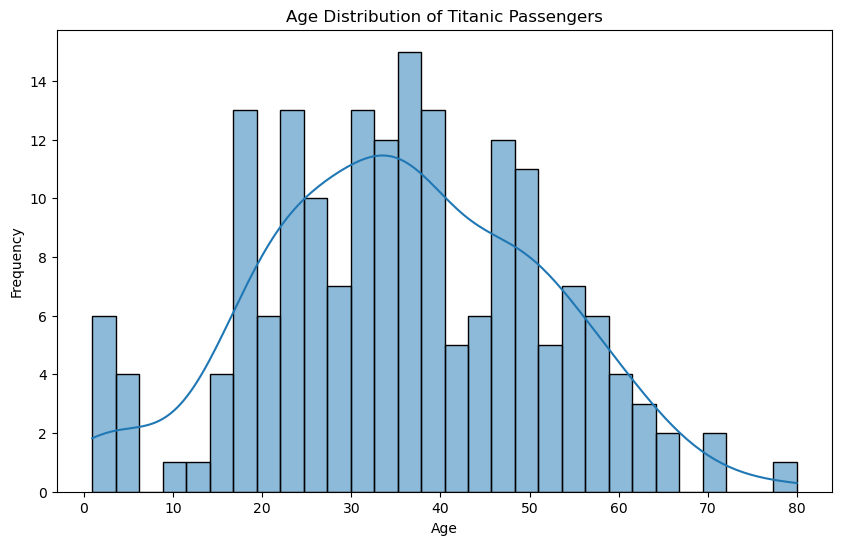

In [9]:
# Univariate Analysis
# Histogram of Age
plt.figure(figsize=(10, 6))
sns.histplot(titanic_cleaned['age'], bins=30, kde=True)
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Insight:

- The age distribution is right-skewed, with most passengers being between 20 and 40 years old.
- There are fewer children and elderly passengers.

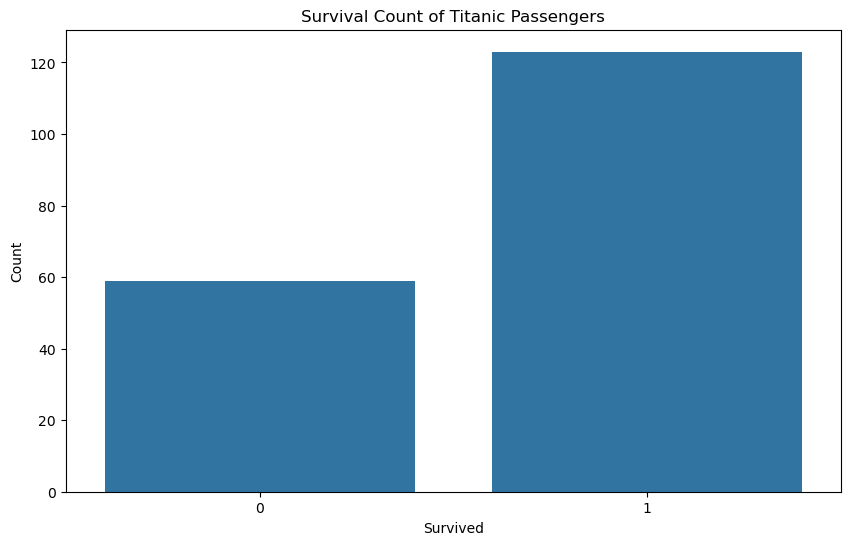

In [10]:
# Count plot of Survival
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic_cleaned, x='survived')
plt.title('Survival Count of Titanic Passengers')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

Insight:

- More passengers did not survive the Titanic disaster than those who did.
- The dataset is imbalanced with respect to the survival status.

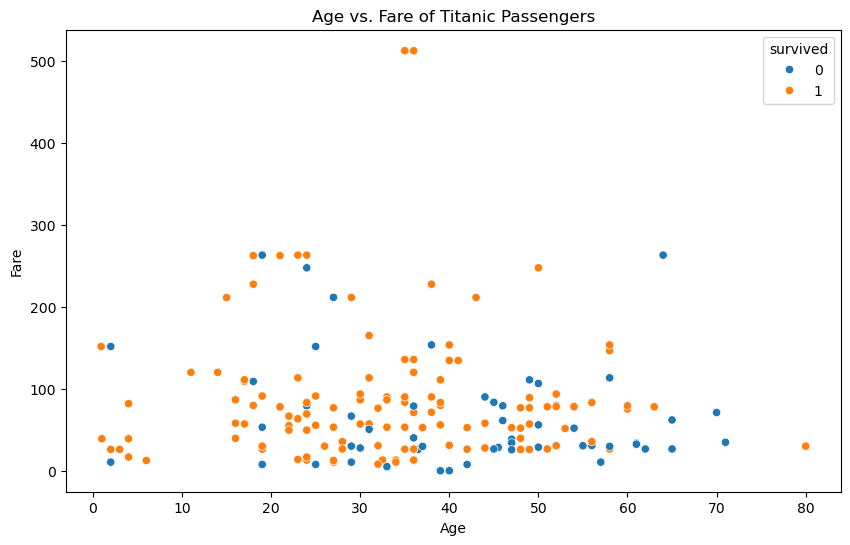

In [11]:
# Bivariate Analysis

# Scatter plot of Age vs. Fare
plt.figure(figsize=(10, 6))
sns.scatterplot(data=titanic_cleaned, x='age', y='fare', hue='survived')
plt.title('Age vs. Fare of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

Insight:

- There is no clear linear relationship between age and fare.
- Passengers who paid higher fares have varied ages and a mix of survival statuses.

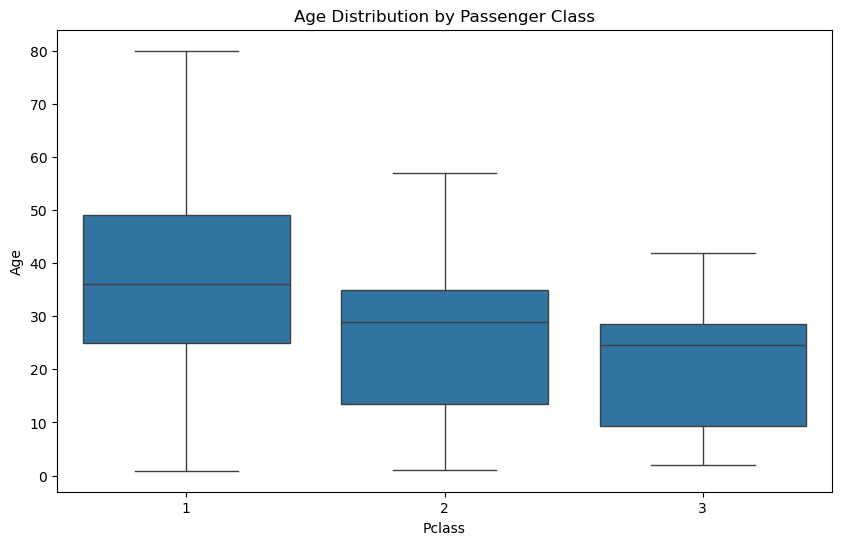

In [12]:
# **Box Plot of Age by Pclass:**

# Box plot of Age by Pclass
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic_cleaned, x='pclass', y='age')
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

Insight:

- Passengers in the first class are generally older than those in the second and third classes.
- There are some outliers, especially in the third class, indicating younger passengers.

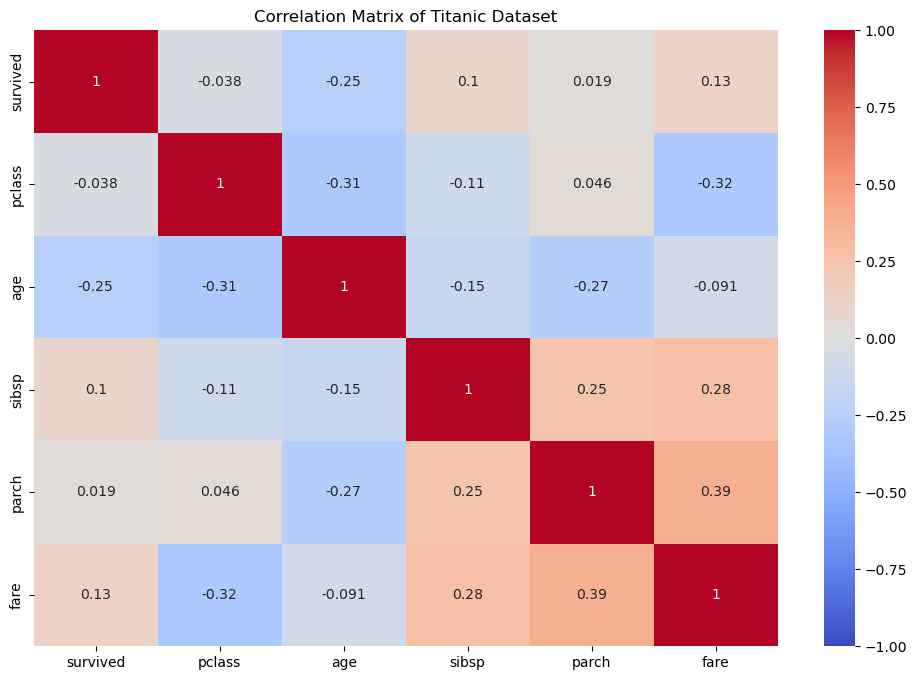

In [13]:
# Multivariate Analysis

# Select only numeric columns
numeric_cols = titanic_cleaned.select_dtypes(include=[np.number])

# Correlation matrix
corr_matrix = numeric_cols.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()

Insight:

- There are strong positive correlations between 'pclass' and 'fare'.
- 'Survived' shows some correlation with 'pclass' and 'fare', indicating higher class and higher fare might have a positive impact on survival.

<Figure size 1200x800 with 0 Axes>

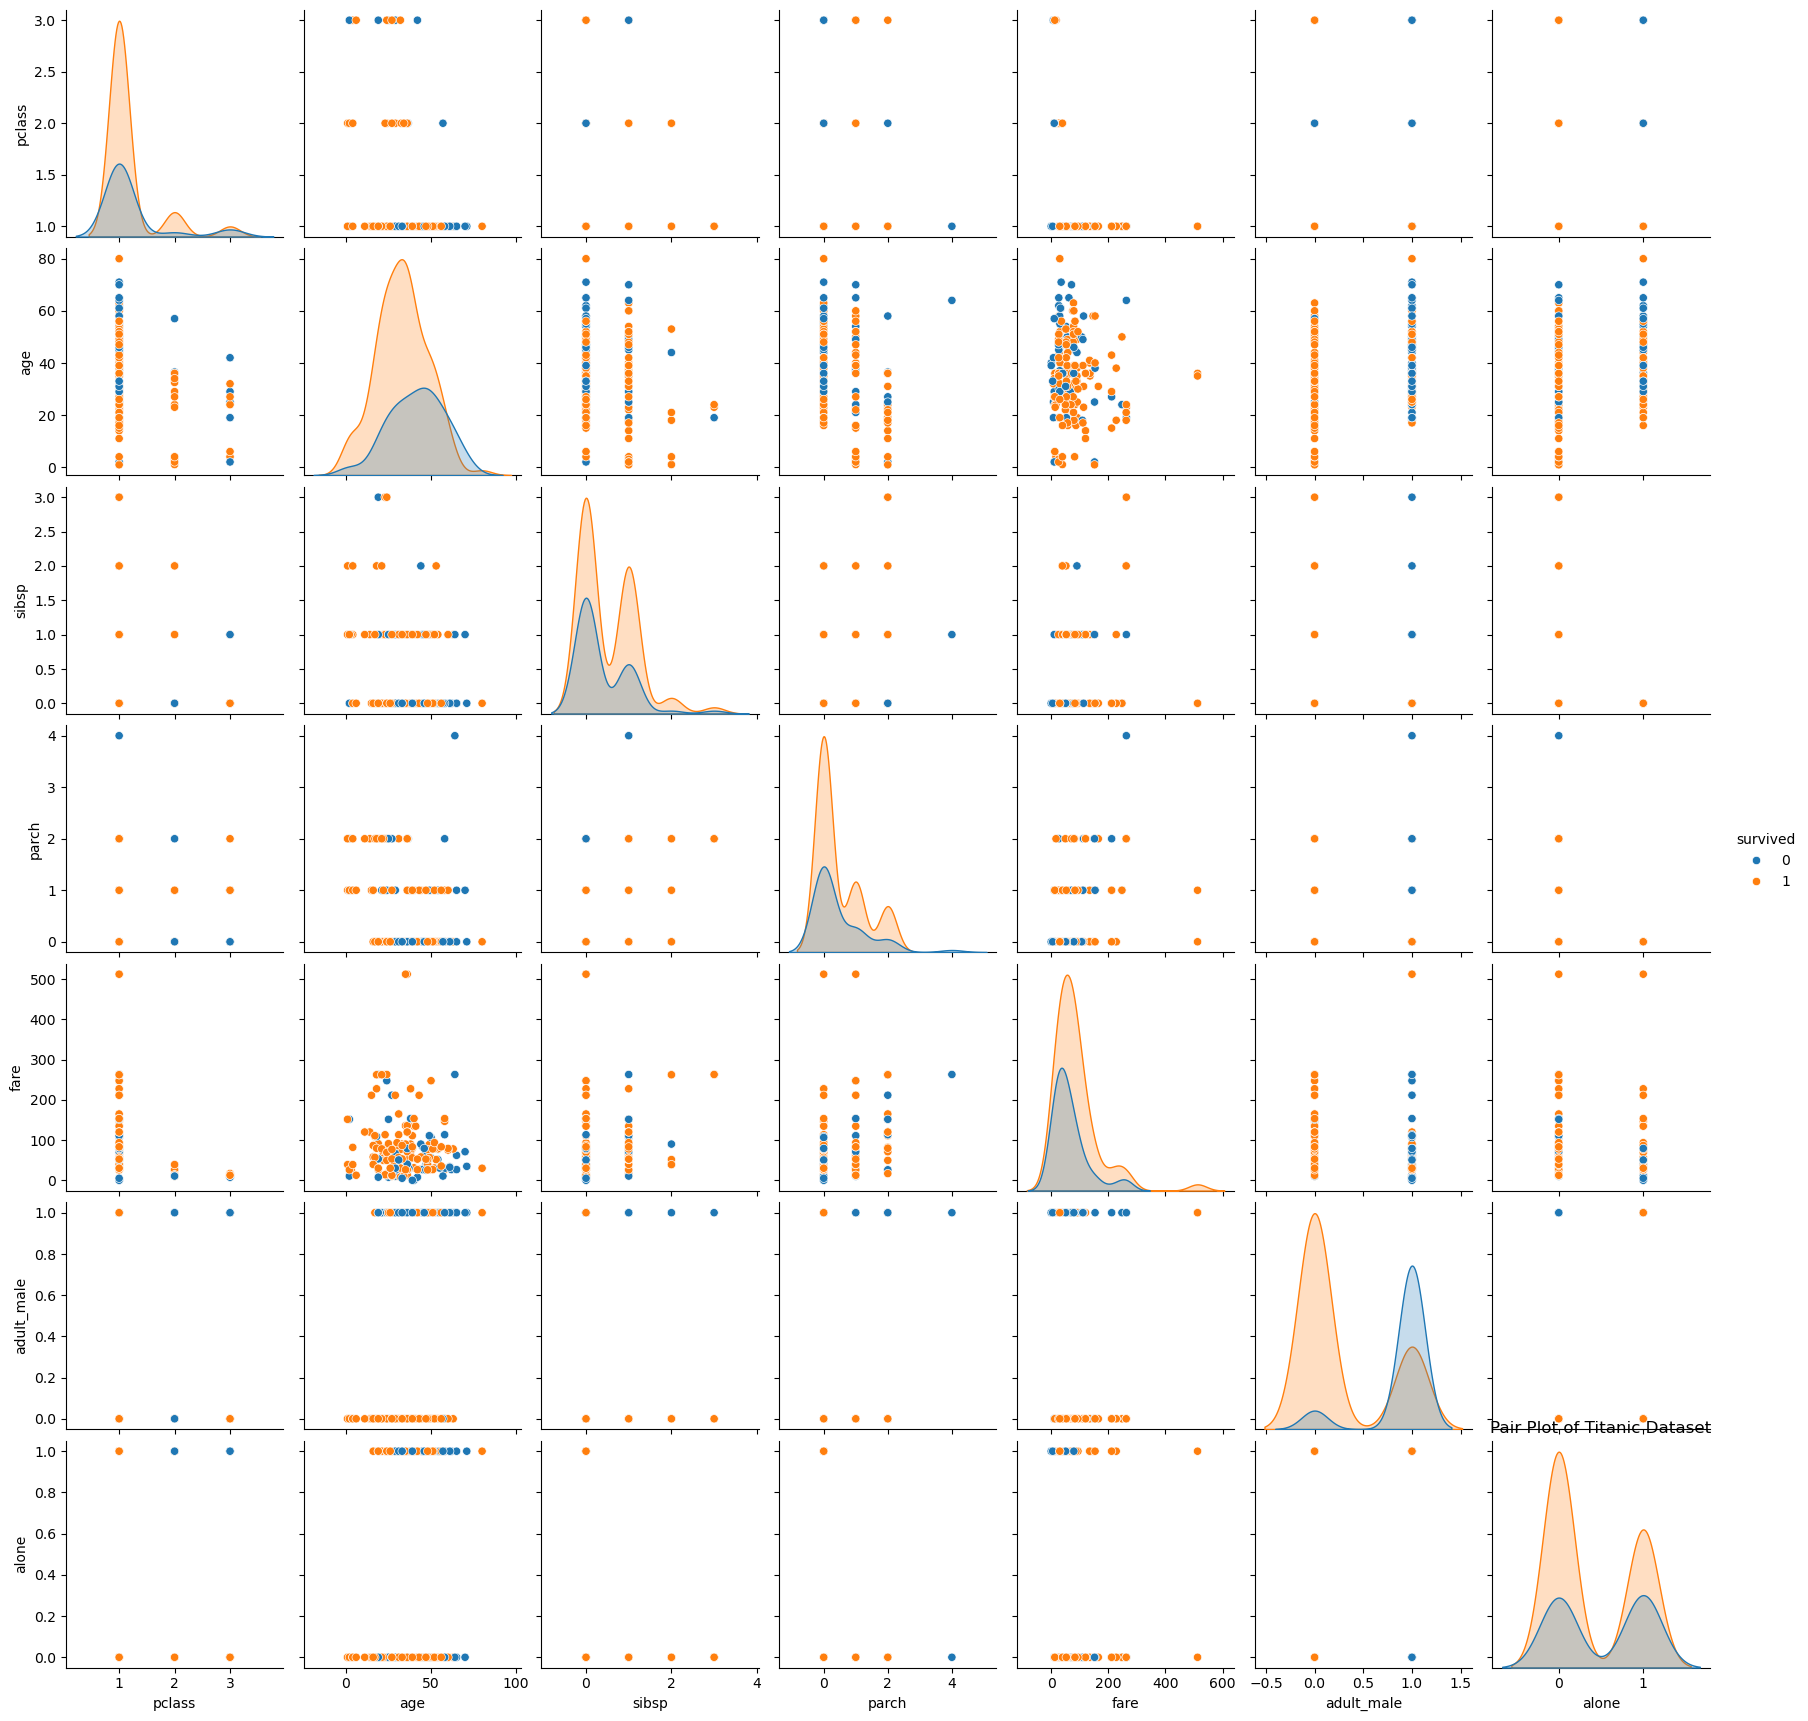

In [14]:
# Pair plot
plt.figure(figsize=(12, 8))
sns.pairplot(titanic_cleaned, hue='survived', diag_kind='kde')
plt.title('Pair Plot of Titanic Dataset')
plt.show()

Insight:

- The pair plot provides a visual summary of the relationships between different numeric variables.
- The diagonal plots show the distribution of individual variables.
- The scatter plots show potential relationships between pairs of variables, colored by survival status.


# Conclusion

Through this EDA, we have explored the characteristics, distributions, correlations, and potential outliers in the Titanic dataset. The visualizations provided insights into the data, such as the age distribution, survival rates, and relationships between different variables.

By following these steps, you can gain a deeper understanding of any dataset and prepare it for further analysis or modeling. If you have a specific dataset you'd like to explore, feel free to provide it, and we can tailor the EDA to that data.

# Project Summary

In this exploratory data analysis of the Titanic dataset, we aimed to uncover insights into the characteristics, distributions, and relationships of various variables:

Data Overview:
We started with an overview of the dataset, identifying the columns and their data types. We observed missing values in several columns, which we handled by dropping rows with missing data for simplicity.

Univariate Analysis:
We visualized the distribution of individual variables such as age and survival status. The age distribution was right-skewed, and the survival count showed more non-survivors.

Bivariate Analysis:
We explored relationships between two variables at a time. For example, we found no clear relationship between age and fare, but identified that older passengers were more likely to be in the first class.

Multivariate Analysis:
We examined the correlations between numeric variables and used heatmaps and pair plots to visualize these relationships. We found that higher passenger classes and fares were somewhat associated with better survival chances.

Through this analysis, we gained valuable insights into the Titanic dataset, which can be further used for predictive modeling or more advanced statistical analysis. The visualizations and correlations help us understand the underlying patterns and relationships in the data, guiding future analyses and decision-making processes.